 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [ ]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

Скачаем обучающую и контрольную выборки.

In [ ]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=None)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=None)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

#classes = (<перечислите классы как строки>)

Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.
* Сколько картинок в train? В test?
* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [ ]:
# <Ваш код здесь (может занимать много ячеек)> 


In [ ]:
print("Колво картинок в train: ", len(trainset))

Колво картинок в train:  60000


In [ ]:
print("Колво картинок в test: ", len(testset))

Колво картинок в test:  10000


In [ ]:
_, trainset_counts = trainset.train_labels.unique(return_counts=True)
print(trainset_counts)
_, testset_counts = testset.train_labels.unique(return_counts=True)
print(testset_counts)

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])
tensor([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])


Мы видим, что все классы распределены равномерно как в тренировочной выборке так и в тестовой.

Sandal
Trouser
Sandal
Trouser


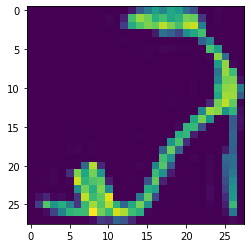

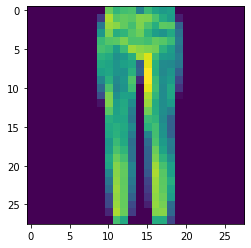

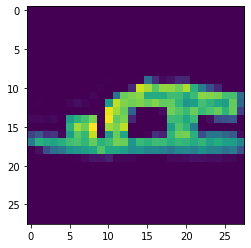

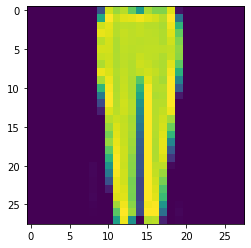

In [ ]:
# Let's print some pics:
for i in range(4):
  i = np.random.randint(low=0, high=50000)
  plt.figure()
  plt.imshow(trainloader.dataset.data[i])
  print (trainloader.dataset.classes[trainloader.dataset.targets[i]])

In [ ]:
from keras.layers import Conv2D
%tensorflow_version 1.x
# Импортируем сам keras
import keras
# Последовательный тип модели
from keras.models import Sequential
# Импортируем полносвязный слой, слои активации и слой, превращающий картинку в вектор
from keras.layers import Dense, Activation, Flatten, Dropout, MaxPooling2D
# Импортируем датасеты, чтобы вытащить оттуда нужные нам данные
import keras.datasets

import numpy as np
from matplotlib import pyplot as plt

# Эти библиотеки отключают лишние предупреждения от библиотек, в частности,
# tensorflow, чтобы не засорять вывод наших результатов
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import warnings
warnings.filterwarnings("ignore")

# keras является оболочкой для более низкоуровневых библиотек, 
# в нашем случае мы используем tensorflow, у которого на данный момент 
# поддерживаются две версии, установим первую
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
%%capture
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
from tensorflow.keras.utils import to_categorical 

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
input_size = X_train[0].shape

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
input_size = X_train[0].shape

In [ ]:
input_size

(28, 28, 1)

In [ ]:
# Многослойная нейросеть
best_cnn = Sequential()

best_cnn.add(Flatten())

#...

best_cnn.add(Dense(128, activation='relu'))

best_cnn.add(Dense(64, activation='relu'))
best_cnn.add(Dropout(0.4))
best_cnn.add(Dense(80, activation='relu'))
best_cnn.add(Dropout(0.2))
best_cnn.add(Dense(10, activation='softmax'))


best_cnn.compile(loss='categorical_crossentropy',
                  optimizer = 'nadam',
                  metrics = ['accuracy'])

In [ ]:
history_cnn = best_cnn.fit(X_train, y_train,
      batch_size=64 ,#например, 128
      epochs=10,#например, 12
      validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.6586 - acc: 0.7674 - val_loss: 0.4399 - val_acc: 0.8352
Epoch 2/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4456 - acc: 0.8429 - val_loss: 0.3841 - val_acc: 0.8613
Epoch 3/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3957 - acc: 0.8595 - val_loss: 0.3897 - val_acc: 0.8612
Epoch 4/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3635 - acc: 0.8716 - val_loss: 0.3548 - val_acc: 0.8734
Epoch 5/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3460 - acc: 0.8771 - val_loss: 0.3565 - val_acc: 0.8695
Epoch 6/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3294 - acc: 0.8822 - val_loss: 0.3800 - val_acc: 0.8620
Epoch 7/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3183 - acc: 0.8859 - val_loss: 

In [ ]:
best_cnn.evaluate(X_test, y_test)

[0.33679058059453965, 0.8775]

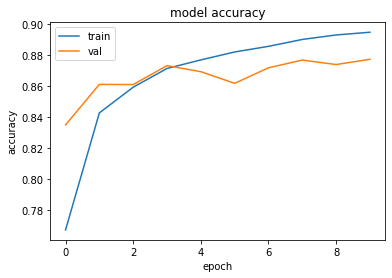

In [ ]:
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

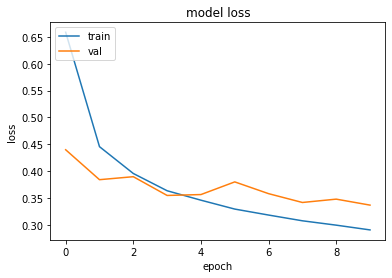

In [ ]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
# Сверточная нейросеть
best_cnn = Sequential()

# best_cnn.add(Conv2D(1, (16, 5), input_shape=input_size, activation='relu'))
# #...
# best_cnn.add(MaxPooling2D(pool_size = 2, strides = 2))
# # best_cnn.add(Dropout(0.4))
# best_cnn.add(Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'))
# best_cnn.add(MaxPooling2D(pool_size = 2, strides = 2))
# best_cnn.add(Flatten())
# #...
# best_cnn.add(Dense(256, activation='relu'))
# best_cnn.add(Dense(10, activation='softmax')


best_cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
best_cnn.add(MaxPooling2D((2, 2)))

best_cnn.add(Flatten())

best_cnn.add(Dense(128, activation='relu'))
best_cnn.add(Dropout(0.4))
best_cnn.add(Dense(10, activation='softmax'))


best_cnn.compile(loss='categorical_crossentropy',
                  optimizer = 'nadam',
                  metrics = ['accuracy'])

In [ ]:
best_cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 12544)             0         
                                                                 
 dense_30 (Dense)            (None, 128)               1605760   
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 10)                1290      
                                                      

In [ ]:
history_cnn = best_cnn.fit(X_train, y_train,
      batch_size=32 ,#например, 128
      epochs=10,#например, 12
      validation_data=(X_test, y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 306us/sample - loss: 0.4373 - acc: 0.8421 - val_loss: 0.3149 - val_acc: 0.8857
Epoch 2/10
60000/60000 [==============================] - 18s 297us/sample - loss: 0.3070 - acc: 0.8897 - val_loss: 0.2782 - val_acc: 0.8933
Epoch 3/10
60000/60000 [==============================] - 18s 294us/sample - loss: 0.2666 - acc: 0.9033 - val_loss: 0.2665 - val_acc: 0.9049
Epoch 4/10
60000/60000 [==============================] - 17s 291us/sample - loss: 0.2413 - acc: 0.9101 - val_loss: 0.2596 - val_acc: 0.9076
Epoch 5/10
60000/60000 [==============================] - 18s 292us/sample - loss: 0.2215 - acc: 0.9183 - val_loss: 0.2463 - val_acc: 0.9119
Epoch 6/10
60000/60000 [==============================] - 18s 293us/sample - loss: 0.2018 - acc: 0.9246 - val_loss: 0.2488 - val_acc: 0.9112
Epoch 7/10
60000/60000 [==============================] - 18s 294us/sample - loss: 0.1872 - acc: 0.9298 

In [ ]:
best_cnn.evaluate(X_test, y_test)

[0.26955379804074764, 0.9191]

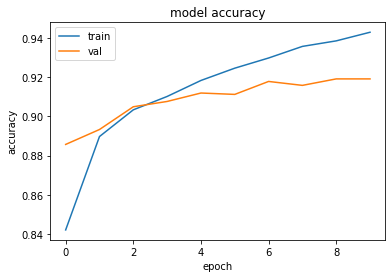

In [ ]:
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

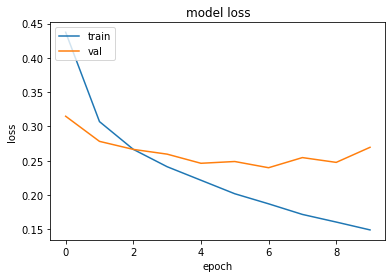

In [ ]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()